In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


|function|explanation|
|---|---|
|tf.add:|addition|
|tf.subtract:|subtraction|
|tf.multiply:|multiplication|
|tf.divide:|divison|
|tf.truncatemod:|residue %|
|tf.negative:|returns negative


#### Tensorflow first builds an algorithm and generates session

In [22]:
a = tf.placeholder('float')
b = tf.placeholder('float')
y = tf.truncatemod(a,b)
sess = tf.Session() #starting session
print (sess.run(y, feed_dict = {a:-3, b:4}))

-3.0


### Regression

#### data building

In [ ]:
import numpy as np
num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0,0.55) #make random number from normal distribution, np.random.normal(mean,std)
    y1 = x1*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

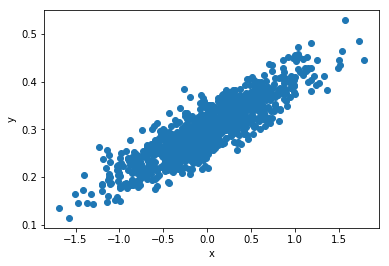

In [52]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### building regression via tensorflow

`W` is a weight tensor which has one element uniformly distributed between -1 and 1. 
`b` is a bias tensor with 1* 1 size


In [60]:
W = tf.Variable(tf.random_uniform([1], -1.0,1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

building loss function. Use gradient descendent with learning rate of 0.5

In [61]:
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Initialize all variables and start the session

In [63]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

0 [-0.01187337] [0.2988163] 0.0045656166


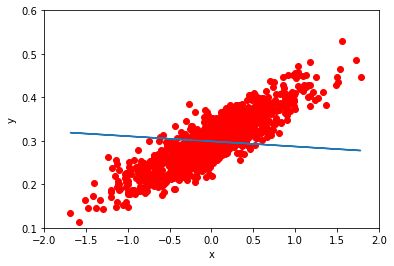

1 [0.02151887] [0.2990832] 0.0026716695


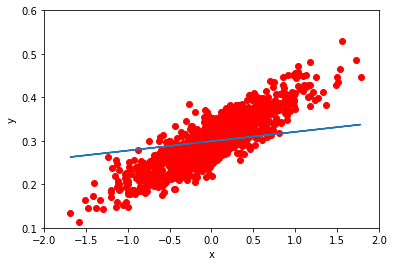

2 [0.04484112] [0.29928002] 0.0017477779


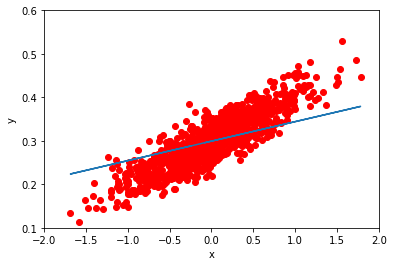

3 [0.06113022] [0.29941747] 0.001297092


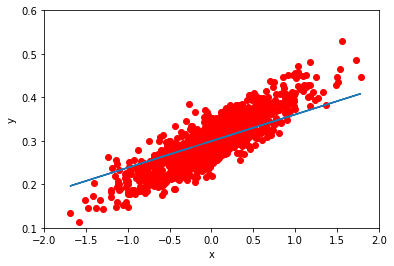

4 [0.07250711] [0.2995135] 0.0010772414


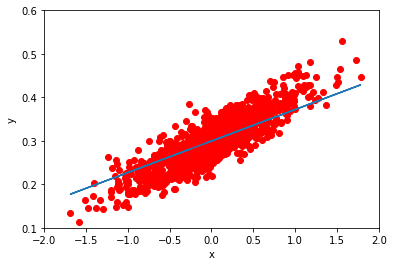

5 [0.08045314] [0.29958054] 0.0009699957


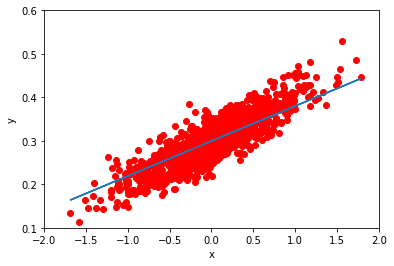

6 [0.08600293] [0.29962736] 0.00091767986


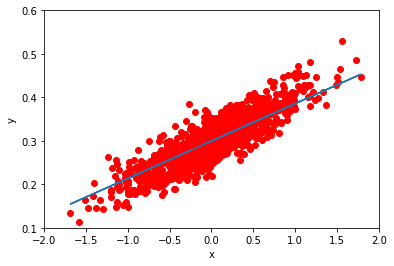

7 [0.0898791] [0.2996601] 0.00089215947


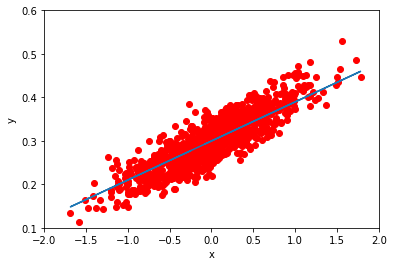

In [64]:
for num in range(8):
    sess.run(train)
    print(num, sess.run(W), sess.run(b), sess.run(loss))
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()